U= 10010896
s= [8393.76575445  196.86703724  124.44759076   51.77010401]
Eigenvector: 
 [[-0.59565496  0.7674883   0.17510354 -0.15967353]
 [ 0.52596833  0.53045901  0.06728492  0.66139496]
 [-0.46370487 -0.35869823  0.54301922  0.60120171]
 [ 0.3918294   0.030175    0.81849962 -0.4190675 ]] 

Eigenvalues: 
 [2.21296817 0.29348958 0.80468866 0.69011821] 

Room Temp ( C )             24.7213
Room reative humadity %     54.4500
Radiant Temp 1 (C)          24.0000
Wind Speed (mm/s)          140.0000
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


 PCA :

[[ 0.59565496 -0.17510354 -0.15967353 -0.7674883 ]
 [-0.52596833 -0.06728492  0.66139496 -0.53045901]
 [ 0.46370487 -0.54301922  0.60120171  0.35869823]
 [-0.3918294  -0.81849962 -0.4190675  -0.030175  ]]
[0 1 2 3]


C:\Users\vision\AppData\Local\Temp\ipykernel_16240\1251076063.py:75: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():




 Unrotated FA :

[[ 0.76666709 -0.0187838  -0.         -0.        ]
 [-0.66833895 -0.06113805  0.         -0.        ]
 [ 0.56406603 -0.12690755  0.          0.        ]
 [-0.44370586 -0.11118236 -0.         -0.        ]]
[0 1 2 3]


 Varimax FA :

[[ 0.76568893  0.0430315   0.          0.        ]
 [-0.66124267 -0.11477343  0.          0.        ]
 [ 0.57245546 -0.08106022  0.          0.        ]
 [-0.43330847 -0.14656115  0.          0.        ]]
[0 1 2 3]


C:\Users\vision\AppData\Local\Temp\ipykernel_16240\1251076063.py:75: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\vision\AppData\Local\Temp\ipykernel_16240\1251076063.py:75: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


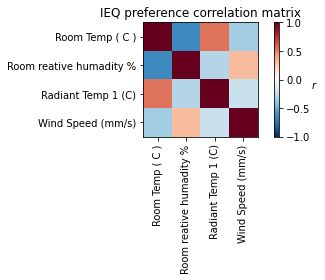

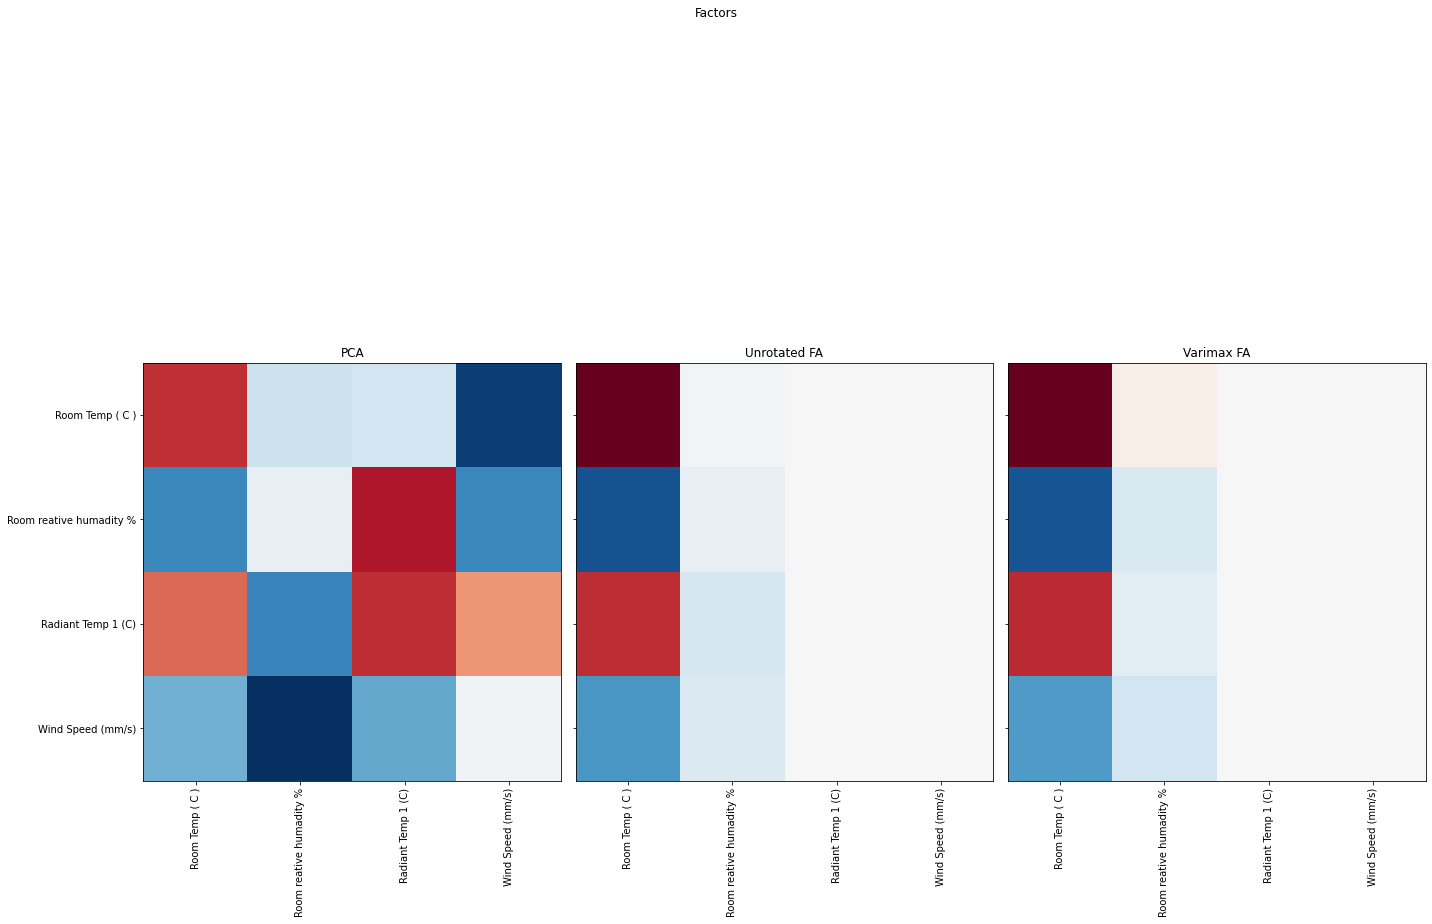

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as alg

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = pd.read_excel (r'C:\Users\vision\Dropbox\ROS\Arch_Plans_Paper\DataSheetsCleaned\all_Measured_Data.xlsx',sheet_name='all_Measured_Data')
df = pd.DataFrame(data, columns= ['Room Temp ( C )',
                                  'Room reative humadity %',
                                  'Radiant Temp 1 (C)',
                                  'Wind Speed (mm/s)'])
feature_names = df.iloc[0].T
#print (df)
#df.head()
u, s, vh = alg.svd(df, full_matrices=True)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
pca = PCA(n_components=1)
pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca
             #, columns = ['pca1', 'pca2'])
    
print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['Room Temp ( C )','Room reative humadity %',
                                  'Radiant Temp 1 (C)',
                                  'Wind Speed (mm/s)']
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 4

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    print(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(featurenames)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(featurenames,rotation=90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

